In [4]:
import pandas as pd

# Load the dataset
file_path = 'ball_by_ball_it20.csv'
df = pd.read_csv(file_path)

# Preview the data
print(df.head())  # Displays the first 5 rows
print(df.info())  # Summary of columns and data types
print(df.describe())  # Statistical summary for numeric columns


   Unnamed: 0  Match ID        Date            Venue    Bat First  \
0           0   1339605  2023-03-26  SuperSport Park  West Indies   
1           1   1339605  2023-03-26  SuperSport Park  West Indies   
2           2   1339605  2023-03-26  SuperSport Park  West Indies   
3           3   1339605  2023-03-26  SuperSport Park  West Indies   
4           4   1339605  2023-03-26  SuperSport Park  West Indies   

     Bat Second  Innings  Over  Ball     Batter  ...        Winner  \
0  South Africa        1     1     1    BA King  ...  South Africa   
1  South Africa        1     1     2  KR Mayers  ...  South Africa   
2  South Africa        1     1     3    BA King  ...  South Africa   
3  South Africa        1     1     4  J Charles  ...  South Africa   
4  South Africa        1     1     5  J Charles  ...  South Africa   

  Chased Successfully  Total Batter Runs  Total Non Striker Runs  \
0                   1                  1                       0   
1                   1       

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check unique values in key columns
for column in ['Match ID', 'Venue', 'Bat First', 'Bat Second', 'Winner']:
    print(f"Unique values in {column}: {df[column].unique()}")


Missing Values:
 Unnamed: 0                      0
Match ID                        0
Date                            0
Venue                           0
Bat First                       0
Bat Second                      0
Innings                         0
Over                            0
Ball                            0
Batter                          0
Non Striker                     0
Bowler                          0
Batter Runs                     0
Extra Runs                      0
Runs From Ball                  0
Ball Rebowled                   0
Extra Type                      0
Wicket                          0
Method                     401460
Player Out                 401460
Innings Runs                    0
Innings Wickets                 0
Target Score                    0
Runs to Get                224815
Balls Remaining                 0
Winner                          0
Chased Successfully             0
Total Batter Runs               0
Total Non Striker Runs         

Missing Percentage:
 Unnamed: 0                  0.000000
Match ID                    0.000000
Date                        0.000000
Venue                       0.000000
Bat First                   0.000000
Bat Second                  0.000000
Innings                     0.000000
Over                        0.000000
Ball                        0.000000
Batter                      0.000000
Non Striker                 0.000000
Bowler                      0.000000
Batter Runs                 0.000000
Extra Runs                  0.000000
Runs From Ball              0.000000
Ball Rebowled               0.000000
Extra Type                  0.000000
Wicket                      0.000000
Method                     94.434735
Player Out                 94.434735
Innings Runs                0.000000
Innings Wickets             0.000000
Target Score                0.000000
Runs to Get                52.882840
Balls Remaining             0.000000
Winner                      0.000000
Chased Successful

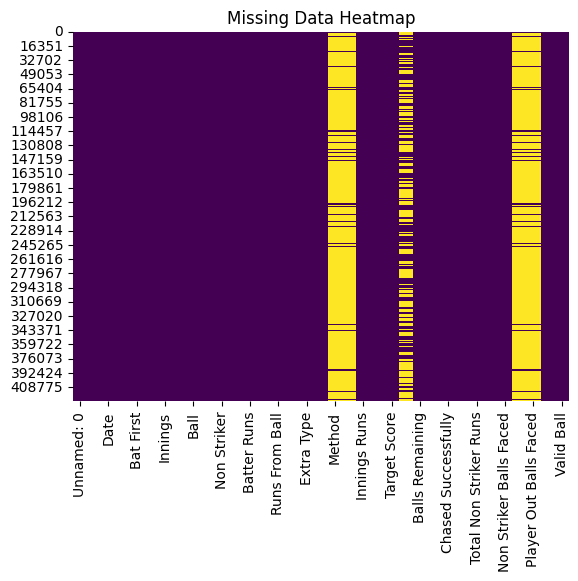

In [6]:
# Percentage of missing data
missing_percentage = (missing_values / len(df)) * 100
print("Missing Percentage:\n", missing_percentage)

# Visualize missing data if necessary
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [7]:
# Convert columns to correct data types if needed
df['Date'] = pd.to_datetime(df['Date'])  # Convert date to datetime
df['Over'] = df['Over'].astype(int)  # Ensure numeric values are integers


In [8]:
# Save cleaned data
df.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned data saved as 'cleaned_dataset.csv'")


Cleaned data saved as 'cleaned_dataset.csv'


In [9]:
# Summarize runs, wickets, and overs for each innings
match_summary = df.groupby(['Match ID', 'Innings']).agg({
    'Batter Runs': 'sum',          # Total runs
    'Extra Runs': 'sum',           # Extras contributed
    'Ball': 'count',               # Total balls faced
    'Batter': 'nunique',           # Unique batters (optional)
    'Bowler': 'nunique'            # Unique bowlers (optional)
}).reset_index()

# Add overs column
match_summary['Overs'] = match_summary['Ball'] // 6 + (match_summary['Ball'] % 6) / 10
print(match_summary.head())


   Match ID  Innings  Batter Runs  Extra Runs  Ball  Batter  Bowler  Overs
0    211028        1          173           6   125       8       6   20.5
1    211028        2           73           6    90      11       5   15.0
2    211048        1          202          12   123       7       5   20.3
3    211048        2          168           2   122      11       6   20.2
4    222678        1          125           8   120      11       5   20.0


In [10]:
# Top batsmen by match
top_batsmen = df.groupby(['Match ID', 'Batter'])['Batter Runs'].sum().reset_index()
top_batsmen = top_batsmen.sort_values(by=['Match ID', 'Batter Runs'], ascending=[True, False])
print(top_batsmen.head())

# Add team performance summaries (optional)
team_summary = df.groupby(['Match ID', 'Bat First']).agg({
    'Batter Runs': 'sum',
    'Extra Runs': 'sum'
}).reset_index()


    Match ID          Batter  Batter Runs
16    211028  PD Collingwood           46
10    211028  ME Trescothick           41
9     211028    KP Pietersen           34
8     211028    JN Gillespie           24
7     211028        GO Jones           19


In [11]:
# Perform one-hot encoding
encoded_df = pd.get_dummies(df[['Venue', 'Bat First', 'Bat Second']], drop_first=True)

# Merge with match-level summary
final_df = match_summary.merge(encoded_df, left_on='Match ID', right_index=True)
print(final_df.head())


   Match ID  Innings  Batter Runs  Extra Runs  Ball  Batter  Bowler  Overs  \
0    211028        1          173           6   125       8       6   20.5   
1    211028        2           73           6    90      11       5   15.0   
2    211048        1          202          12   123       7       5   20.3   
3    211048        2          168           2   122      11       6   20.2   
4    222678        1          125           8   120      11       5   20.0   

   Venue_Adelaide Oval  \
0                False   
1                False   
2                False   
3                False   
4                False   

   Venue_Al Amerat Cricket Ground Oman Cricket (Ministry Turf 1)  ...  \
0                                              False              ...   
1                                              False              ...   
2                                              False              ...   
3                                              False              ...   
4        

In [12]:
# Encode Winner
df['Winner_Encoded'] = df['Winner'].apply(lambda x: 1 if x == 'Bat First' else 0)

# Ensure match-level data includes the target
final_df = final_df.merge(df[['Match ID', 'Winner_Encoded']].drop_duplicates(), on='Match ID')


In [13]:
# Check final structure
print(final_df.info())

# Save preprocessed data
final_df.to_csv('victory_prediction_features.csv', index=False)
print("Feature engineering complete. Data saved to 'victory_prediction_features.csv'")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 380 entries, Match ID to Winner_Encoded
dtypes: bool(371), float64(1), int64(8)
memory usage: 115.2 KB
None
Feature engineering complete. Data saved to 'victory_prediction_features.csv'


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Reload the cleaned dataset for safety
file_path_cleaned = 'cleaned_dataset.csv'
df = pd.read_csv(file_path_cleaned)

# Initialize LabelEncoder for categorical variables
encoder = LabelEncoder()

# Step 1: Feature Engineering - Create match-level aggregates and performance metrics
# Aggregate by match_id to summarize stats

match_features = df.groupby('Match ID').agg({
    'Innings': ['max'],
    'Over': ['max'],
    'Ball': ['count'],
    'Batter': ['nunique'],
    'Non Striker': ['nunique'],
    'Bowler': ['nunique'],
    'Batter Runs': ['sum', 'mean', 'std'],
    'Innings Wickets': ['sum'],
    'Extra Type': ['nunique'],
    'wides': ['sum'],
    'noballs': ['sum'],
    'legbyes': ['sum'],
    'byes': ['sum'],
    'penalty': ['sum']
})

# Flatten multi-level columns
match_features.columns = ['_'.join(col).strip() for col in match_features.columns]

# Reset index for ease of merging later
match_features.reset_index(inplace=True)

# Step 2: Add winner as a target variable and encode it
df_match = df[['match_id', 'winner']].drop_duplicates()  # Unique matches and winners
df_match['winner_encoded'] = encoder.fit_transform(df_match['winner'])

# Merge engineered features with match outcomes
final_features = pd.merge(match_features, df_match, on='match_id')

# Step 3: Save processed data for model development
output_file_path = 'processed_t20_match_features.csv'
final_features.to_csv(output_file_path, index=False)

KeyError: "Column(s) ['Extra Type ', 'byes', 'legbyes', 'noballs', 'penalty', 'wides'] do not exist"

In [3]:
import pandas as pd

# Load the processed dataset
file_path = 'ball_by_ball_it20.csv'
df = pd.read_csv(file_path)
df.head()


,Unnamed: 0,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,0,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,1,BA King,...,South Africa,1,1,0,1,0,NaN,NaN,1,1
1,1,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,...,South Africa,1,1,1,1,1,NaN,NaN,1,1
2,2,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,3,BA King,...,South Africa,1,0,1,0,1,1.0,2.0,0,1
3,3,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,...,South Africa,1,0,1,1,1,NaN,NaN,0,1
4,4,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,...,South Africa,1,4,1,2,1,NaN,NaN,4,1


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
encoder = LabelEncoder()

# Extract key columns and create new features
df['cumulative_runs'] = df.groupby(['Match ID', 'Innings'])['Batter Runs'].cumsum()
df['cumulative_wickets'] = df.groupby(['Match ID', 'Innings'])['Wicket'].cumsum()
df['current_run_rate'] = df['cumulative_runs'] / (df['Over'] + df['Ball'] / 6)

# Calculate runs in the last 5 overs
df['runs_in_last_5_overs'] = df.groupby(['Match ID', 'Innings'])['Batter Runs'].rolling(window=30, min_periods=1).sum().reset_index(level=[0,1], drop=True)

# Calculate boundaries count
df['boundaries_count'] = df.groupby(['Match ID', 'Innings'])['Batter Runs'].apply(lambda x: x.rolling(window=30, min_periods=1).apply(lambda y: (y == 4).sum() + (y == 6).sum(), raw=True))

# Calculate extras total
df['extras_total'] = df.groupby(['Match ID', 'Innings'])['Extra Runs'].cumsum()

# Extract relevant columns
key_columns = [
    'Match ID', 'Bat First', 'Bat Second', 'Venue', 'Innings', 'Over', 'Ball', 'cumulative_runs', 
    'cumulative_wickets', 'current_run_rate', 'Batter', 'Non Striker', 'Bowler', 'runs_in_last_5_overs', 
    'boundaries_count', 'extras_total', 'Winner'
]

# Create a new DataFrame with the key columns
df_key = df[key_columns]

# Rename columns for clarity
df_key.rename(columns={
    'Match ID': 'match_id',
    'Bat First': 'team_batting',
    'Bat Second': 'team_bowling',
    'Venue': 'venue',
    'Innings': 'inning',
    'Batter': 'batsman',
    'Non Striker': 'non_striker',
    'Bowler': 'bowler',
    'Winner': 'defendability_indicator'
}, inplace=True)

# Set inning to 1 for first-inning predictions
df_key['inning'] = 1

# Encode defendability indicator
df_key['defendability_indicator'] = df_key['defendability_indicator'].apply(lambda x: 1 if x == df_key['team_batting'] else 0)

# Save the processed data
df_key.to_csv('processed_match_features.csv', index=False)
print("Processed data saved to 'processed_match_features.csv'")

# Step 1: Feature Engineering - Create match-level aggregates and performance metrics
# Aggregate by match_id to summarize stats
match_features = df.groupby('Match ID').agg({
    'Innings': ['max'],
    'Over': ['max'],
    'Ball': ['count'],
    'Batter': ['nunique'],
    'Non Striker': ['nunique'],
    'Bowler': ['nunique'],
    'Batter Runs': ['sum', 'mean', 'std'],
    'Innings Wickets': ['sum'],
    # Adjust these columns based on your DataFrame
    'Extra Runs': ['sum'],  # Example adjustment
    # Add other columns as needed
})

# Flatten multi-level columns
match_features.columns = ['_'.join(col).strip() for col in match_features.columns]

print(match_features.head())

TypeError: incompatible index of inserted column with frame index